### Multiple Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel('http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls')

                Mileage         Price
Mileage                              
(0, 10000]       5826.5  18954.398514
(10000, 20000]  16514.5  18263.964453
(20000, 30000]  23947.0  17519.883221
(30000, 40000]  33129.5  15528.895963


<AxesSubplot:xlabel='Mileage'>

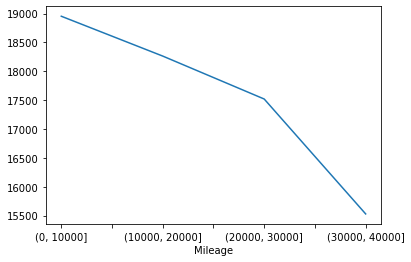

In [3]:
df1 = df[['Mileage','Price']]
# Break out data in groups
bins = np.arange(0, 50000, 10000)
groups = df1.groupby(pd.cut(df1['Mileage'], bins)).median()
print(groups.head())
groups['Price'].plot.line()

In [4]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

### Statsmodel  - OLS

In [10]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None  # default='warn'

In [11]:
scale = StandardScaler()
X = df[['Mileage','Cylinder','Doors']]
y = df['Price']

In [12]:
# loc instead of column ref. direct
X.loc[:, ('Mileage', 'Cylinder', 'Doors')] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].values)
X = sm.add_constant(X)
print(X)


     const   Mileage  Cylinder     Doors
0      1.0 -1.417485   0.52741  0.556279
1      1.0 -1.305902   0.52741  0.556279
2      1.0 -0.810128   0.52741  0.556279
3      1.0 -0.426058   0.52741  0.556279
4      1.0  0.000008   0.52741  0.556279
..     ...       ...       ...       ...
799    1.0 -0.439853   0.52741  0.556279
800    1.0 -0.089966   0.52741  0.556279
801    1.0  0.079605   0.52741  0.556279
802    1.0  0.750446   0.52741  0.556279
803    1.0  1.932565   0.52741  0.556279

[804 rows x 4 columns]


In [8]:
est = sm.OLS(y, X).fit()

In [9]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     150.0
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           3.95e-77
Time:                        07:46:02   Log-Likelihood:                -8356.7
No. Observations:                 804   AIC:                         1.672e+04
Df Residuals:                     800   BIC:                         1.674e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.134e+04    279.405     76.388      0.0